# MODELO DE REGRESIÓN LÓGISTICA 

# Contenido:

**1. [Introducción](#introduccion)** <br>
    - Información de la base de datos<br>
**2. [Librerías](#Librerias)** <br>
    - Importar librerías<br>
    - Importar base de datos<br>
**3. [Conociminto de la información](#Known)** <br>
    - 3.1 Tipos de datos<br>
    - 3.2 Estructura<br>
    - 3.3 Valores nulos<br>
    - 3.4 Valores únicos<br>
**4. [Análisis exploratorio](#Exploración)** <br>
    - 4.1 Graficas y descriptivos<br>
**5. [Pre procesamiento](#Preprocessing)** <br>
	- 5.1 Setting X and Y<br>
    - 5.2 Spliting the X and Y in train and test <br>
**6. [Modelo](#modelo)** <br>
	- 6.2.1 Logistic Regression <br> 
    - 6.2.2 Score values <br>
    - 6.2.3 Cross Validation  <br>
    - 6.2.4 ROC Curvet <br>
**7. [Score](#score)**

# **1. Introducción:** 
<h2>Context</h2>
Esta información proveniente de [UCI](https://archive.ics.uci.edu/ml/datasets/Statlog+%28German+Credit+Data%29), contiene registro de personas con un buen o mal riesgo de crédito proveneinte de un banco de Alemania del año de 1994.

<h2>Contenido</h2>

<b>Age </b>(numeric)<br>
<b>Sex </b>(text: male, female)<br>
<b>Job </b>(numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)<br>
<b>Housing</b> (text: own, rent, or free)<br>
<b>Saving accounts</b> (text - little, moderate, quite rich, rich)<br>
<b>Checking account </b>(numeric - Deutsch Mark)<br>
<b>Credit amount</b> (numeric)<br>
<b>Duration</b> (numeric, in month)<br>
<b>Purpose</b>(text: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others<br>
<b>Risk </b> (Value target - Good or Bad Risk)<br>

<a id="Librarys"></a> <br>
# **2. Librerías:** 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr,spearmanr
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,f1_score,recall_score,classification_report
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [3]:
df_credit = pd.read_csv("https://raw.githubusercontent.com/Olivergz06/An-lisis-de-regresi-n-log-stica-riesgo-decr-dito/main/german_credit_data.csv")
df_credit.rename(columns={'Saving accounts': 'Saving_accounts', 'Checking account': 'Checking_account','Credit amount':'Credit_amount'}, inplace=True)
df_credit

,Age,Sex,Job,Housing,Saving_accounts,Checking_account,Credit_amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good
996,40,male,3,own,little,little,3857,30,car,good
997,38,male,2,own,little,NaN,804,12,radio/TV,good
998,23,male,2,free,little,little,1845,45,radio/TV,bad


<a id="Known"></a> <br>
# **3. Conocimiento de la información:** 
- Tipos de datos
- Estructura
- Valores nulos
- Valores únicos

In [102]:
df_credit.dtypes

Age                  int64
Sex                 object
Job                  int64
Housing             object
Saving_accounts     object
Checking_account    object
Credit_amount        int64
Duration             int64
Purpose             object
Risk                object
dtype: object

In [103]:
df_credit.shape

(1000, 10)

In [104]:
df_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving_accounts   817 non-null    object
 5   Checking_account  606 non-null    object
 6   Credit_amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.2+ KB


In [105]:
df_credit.isna().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving_accounts     183
Checking_account    394
Credit_amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

# **Análisis exploratorio:**

<AxesSubplot:xlabel='Age', ylabel='Density'>

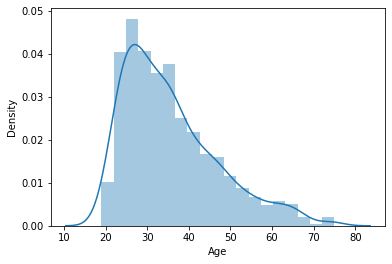

In [106]:
sns.distplot(df_credit.Age)

In [107]:
df_good = df_credit.loc[df_credit["Risk"] == 'good']['Age'].values.tolist()
df_bad = df_credit.loc[df_credit["Risk"] == 'bad']['Age'].values.tolist()
df_age = df_credit['Age'].values.tolist()

#First plot
trace0 = go.Histogram(
    x=df_good,
    histnorm='probability',
    name="Good Credit"
)
#Second plot
trace1 = go.Histogram(
    x=df_bad,
    histnorm='probability',
    name="Bad Credit"
)
#Third plot
trace2 = go.Histogram(
    x=df_age,
    histnorm='probability',
    name="Overall Age"
)

#Creating the grid
fig = tls.make_subplots(rows=2, cols=2, specs=[[{}, {}], [{'colspan': 2}, None]],
                          subplot_titles=('Good','Bad', 'General Distribuition'))

#setting the figs
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig.append_trace(trace2, 2, 1)

fig['layout'].update(showlegend=True, title='Age Distribuition', bargap=0.05)
py.iplot(fig, filename='custom-sized-subplot-with-subplot-titles')

<AxesSubplot:xlabel='Credit_amount', ylabel='Density'>

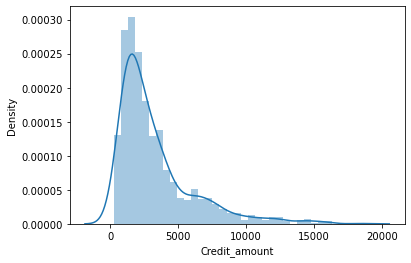

In [109]:
sns.distplot(df_credit["Credit_amount"])

<AxesSubplot:xlabel='Duration', ylabel='Density'>

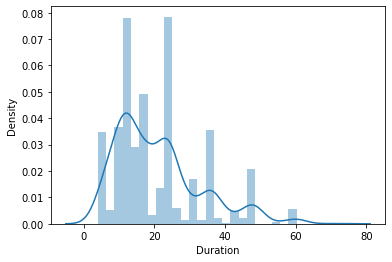

In [110]:
sns.distplot(df_credit.Duration)

In [111]:
df_credit.Risk.value_counts()

good    700
bad     300
Name: Risk, dtype: int64

<AxesSubplot:xlabel='Credit_amount', ylabel='Age'>

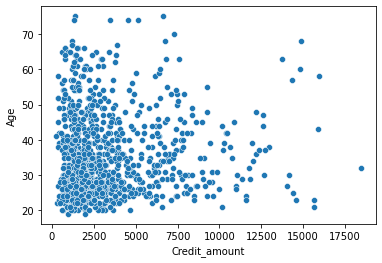

In [113]:
sns.scatterplot(df_credit["Credit_amount"],df_credit.Age)

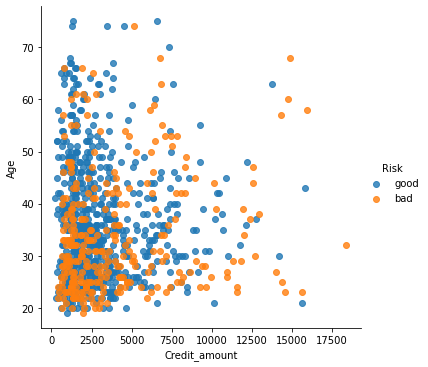

In [115]:
sns.lmplot(x='Credit_amount',y='Age',data=df_credit,hue='Risk',fit_reg=False)

In [116]:
df_credit.head(1)

,Age,Sex,Job,Housing,Saving_accounts,Checking_account,Credit_amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good


In [117]:
df_credit.groupby('Sex')['Risk'].value_counts()/df_credit.groupby('Sex')['Risk'].count()

Sex     Risk
female  good    0.648387
        bad     0.351613
male    good    0.723188
        bad     0.276812
Name: Risk, dtype: float64

In [118]:
df_credit.groupby('Job')['Risk'].value_counts()/df_credit.groupby('Job')['Risk'].count()

Job  Risk
0    good    0.681818
     bad     0.318182
1    good    0.720000
     bad     0.280000
2    good    0.704762
     bad     0.295238
3    good    0.655405
     bad     0.344595
Name: Risk, dtype: float64

In [119]:
df_credit.groupby('Purpose')['Risk'].value_counts()/df_credit.groupby('Purpose')['Risk'].count()

Purpose              Risk
business             good    0.649485
                     bad     0.350515
car                  good    0.685460
                     bad     0.314540
domestic appliances  good    0.666667
                     bad     0.333333
education            good    0.610169
                     bad     0.389831
furniture/equipment  good    0.679558
                     bad     0.320442
radio/TV             good    0.778571
                     bad     0.221429
repairs              good    0.636364
                     bad     0.363636
vacation/others      good    0.583333
                     bad     0.416667
Name: Risk, dtype: float64

In [120]:
df_credit.groupby('Housing')['Risk'].value_counts()/df_credit.groupby('Housing')['Risk'].count()

Housing  Risk
free     good    0.592593
         bad     0.407407
own      good    0.739130
         bad     0.260870
rent     good    0.608939
         bad     0.391061
Name: Risk, dtype: float64

In [122]:
df_credit.groupby('Saving_accounts')['Risk'].value_counts()/df_credit.groupby('Saving_accounts')['Risk'].count()

Saving_accounts  Risk
little           good    0.640133
                 bad     0.359867
moderate         good    0.669903
                 bad     0.330097
quite rich       good    0.825397
                 bad     0.174603
rich             good    0.875000
                 bad     0.125000
Name: Risk, dtype: float64

In [5]:
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
df_credit["Risk_num"] = ord_enc.fit_transform(df_credit[["Risk"]])
df_credit["Purpose_num"] = ord_enc.fit_transform(df_credit[["Purpose"]])
#df_credit["Checking_account"] = ord_enc.fit_transform(df_credit[["Checking_account"]])
#df_credit["Saving_accounts"] = ord_enc.fit_transform(df_credit[["Saving_accounts"]])
df_credit["Housing_num"] = ord_enc.fit_transform(df_credit[["Housing"]])
df_credit["Sex_num"] = ord_enc.fit_transform(df_credit[["Sex"]])

df_credit

,Age,Sex,Job,Housing,Saving_accounts,Checking_account,Credit_amount,Duration,Purpose,Risk,Risk_num,Purpose_num,Housing_num,Sex_num
0,67,male,2,own,NaN,little,1169,6,radio/TV,good,1.0,5.0,1.0,1.0
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad,0.0,5.0,1.0,0.0
2,49,male,1,own,little,NaN,2096,12,education,good,1.0,3.0,1.0,1.0
3,45,male,2,free,little,little,7882,42,furniture/equipment,good,1.0,4.0,0.0,1.0
4,53,male,2,free,little,little,4870,24,car,bad,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good,1.0,4.0,1.0,0.0
996,40,male,3,own,little,little,3857,30,car,good,1.0,1.0,1.0,1.0
997,38,male,2,own,little,NaN,804,12,radio/TV,good,1.0,5.0,1.0,1.0
998,23,male,2,free,little,little,1845,45,radio/TV,bad,0.0,5.0,0.0,1.0


In [6]:
df=df_credit.dropna()
df.shape

(522, 14)

# **5. Pre proceso:**

In [22]:
X=df[["Age","Job","Credit_amount","Duration","Purpose_num","Housing_num","Sex_num"]]
y=df[["Risk_num"]]

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test= train_test_split(X,y)

# **6. Modelo_1:**<a id="modelo"></a>

In [25]:
log_model=LogisticRegression()

In [26]:
log_model.fit(X_train,y_train)

LogisticRegression()

In [28]:
y_pred=log_model.predict(X_train)
y_pred

array([0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 1.,
       1., 0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1.,
       0., 0., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1.,
       1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1.,
       1., 1., 0., 1., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 1., 1., 1.,
       0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1.,
       1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1.,
       1., 0., 1., 0., 1.

In [29]:
accuracy_score(y_train,y_pred)

0.6521739130434783

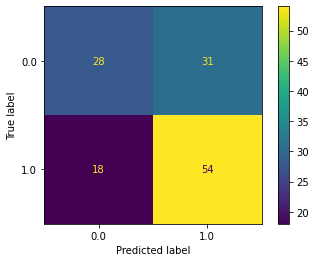

In [30]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(log_model,X_test,y_test)

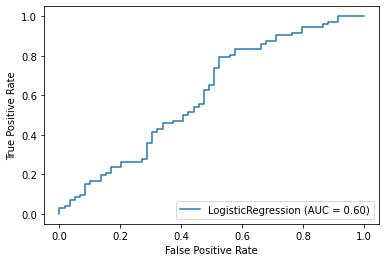

In [31]:
from sklearn.metrics import plot_precision_recall_curve, plot_roc_curve
plot_roc_curve(log_model,X_test,y_test)

# **6. Modelo_2:**

In [32]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_X_train=scaler.fit_transform(X_train)
scaled_X_test=scaler.transform(X_test)

In [33]:
log_model=LogisticRegression()
log_model.fit(scaled_X_train,y_train)
y_pred=log_model.predict(scaled_X_test)

In [34]:
accuracy_score(y_test,y_pred)

0.6183206106870229

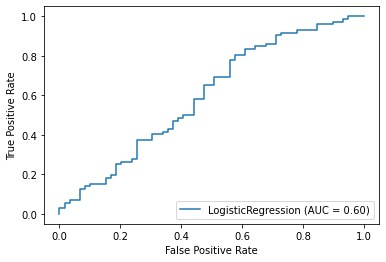

In [35]:
plot_roc_curve(log_model,scaled_X_test,y_test)

In [40]:
y_pred=log_model.predict(scaled_X_test)
y_pred

array([1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 0., 0., 0., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0.,
       1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 1., 0., 1.,
       1., 1., 0., 0., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 1.,
       1., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1.,
       0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0.])

## 7.Score<a id="score"></a>

In [53]:
df_score=pd.DataFrame(log_model.predict_proba(scaled_X_test),columns=["Good","Bad"])
df_score["pred"]=y_pred
#df_score["score"]=np.where(df_score['pred']== 1, np.random.randint(200,650), np.random.randint(650,850))
df_score["score"]=np.round(np.where(df_score['pred']== 1, df_score['Bad']*650, (1-df_score['Bad'])*850))
df_score

,Good,Bad,pred,score
0,0.327910,0.672090,1.0,437.0
1,0.370953,0.629047,1.0,409.0
2,0.665325,0.334675,0.0,566.0
3,0.389285,0.610715,1.0,397.0
4,0.405128,0.594872,1.0,387.0
...,...,...,...,...
126,0.600929,0.399071,0.0,511.0
127,0.638618,0.361382,0.0,543.0
128,0.485578,0.514422,1.0,334.0
129,0.293013,0.706987,1.0,460.0
